# 8 steps of Machine Learning
1. Data gathering
2. data preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature engineering/selection
5. Training model
6. Test model/Model evaluation
7. Hyper Parameter tuning
8. Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data gathering

In [ ]:
data=pd.read_csv('FuelConsumption.csv')
data.head()

Check the basic info and missing values

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Return DataFrame with duplicate rows removed.
data.drop_duplicates(inplace=True)

In [ ]:
# count categorical unique value from make column
data['MAKE'].value_counts()
data.MAKE.value_counts()

In [ ]:
# count categorical unique value from MODEL column
data['MODEL'].value_counts()

In [ ]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

In [ ]:
# count categorical unique value from TRANSMISSION  column
data['TRANSMISSION'].value_counts()

In [ ]:
data['FUELTYPE'].unique() # getting the name of unique value

In [ ]:
# count categorical unique value from FUELTYPE  column
data['FUELTYPE'].value_counts()

In [ ]:
data['MODELYEAR'].value_counts()

In [ ]:
# drop MODELYEAR COLUMN
data.drop(columns=['MODELYEAR'], inplace=True)

Statistical Analysis

In [ ]:
data.describe().T

# 2. Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
# each column transform categorical to numerical value and  update to dataframe
for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']:
    data[col]=encoder.fit_transform(data[col]) 

In [ ]:
data

# 3. EDA

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.scatter(x=data['ENGINESIZE'],y=data['CO2EMISSIONS'])
plt.title('ENGINSIZE VS C02EMISSIONS')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=data)
plt.title('ENGINESIZE VE CO2EMISSIONS')
plt.show()

In [ ]:
sns.distplot(data.ENGINESIZE,kde=False)
data['ENGINESIZE'].plot(kind='hist') # hist/bar
data.ENGINESIZE.plot(kind='hist') # by this plot we can know the distribution of data over x axis

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)

In [ ]:
sns.boxenplot(data=data, x='ENGINESIZE', )

# 4. Feature Engineering/Selection

Finding important features

In [ ]:
correlation=data.corr()
correlation

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [ ]:
# Droping unnecessary ffeatures/column
data.drop(columns=['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION',
          'FUELTYPE', 'FUELCONSUMPTION_COMB_MPG'], inplace=True)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [ ]:
data

    Detect Quartile and remove

In [ ]:
Q1=np.percentile(data.ENGINESIZE, 25, method='midpoint')
Q1

In [ ]:
Q3=np.percentile(data.ENGINESIZE, 75, method='midpoint')
Q3

In [ ]:
iQR=Q3-Q1
iQR

In [ ]:
Q3+1.5*iQR

In [ ]:
Q1-1.5*iQR

In [ ]:
Outliers_index_upper=np.where(data['ENGINESIZE']>Q3+1.5*iQR)
Outliers_index_upper[0]

In [ ]:
Outliers_index_lower=np.where(data['ENGINESIZE']<Q1-1.5*iQR)
Outliers_index_lower[0]

In [ ]:
# Droping Outliers_index
data.drop(Outliers_index_upper[0], inplace=True)

In [ ]:
data

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENGINESIZE'>

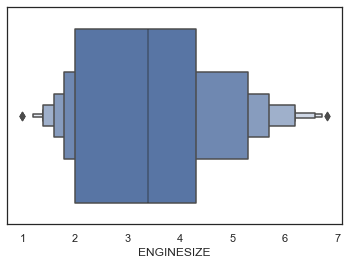

In [61]:
sns.boxenplot(data['ENGINESIZE'])

# 5. Training model

Train & test split

In [ ]:
from sklearn.model_selection import train_test_split

When ues a single feature for modeling then we called simple linear Regression,
on the other hand when use one features for modeling then called multipul linear Regression

In [ ]:
# simple linear rgression
train_features, test_features, train_target, test_target = train_test_split(
    data[['ENGINESIZE']], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)


In [ ]:
test_features

In [ ]:
test_features
test_target

# Step-6: Modeling 

In [ ]:
from sklearn import svm
model=svm.SVR()

In [ ]:
# training our model
model.fit(train_features,train_target)

In [ ]:
# theta 0
model.intercept_ # intercept_ refers theta zero value, it will be always single value

In [ ]:
# theta 1
model.coef_ # coef_ means coefficient which refers theta one values , it may be multipul value

In [ ]:
test_target

In [ ]:
x=test_features.values[0] # return ENGINESIZE OF ZERO INDEX
yhat=model.intercept_ +(model.coef_*x) # mathematical calculation
yhat


In [ ]:
# return CO2EMISSION OF ZERO INDEX
test_target.values[0]   # .values[0]  conert Dataferm to numpy

# 6. Model testing and Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score #sklearn.metrics contain all error evaluation module 

In [ ]:
# mannuly Error calculations
y_hat=model.predict(test_features) # prediction
np.sum((test_target - y_hat)**2)/213


In [ ]:
# error calculation
mean_squared_error(test_target,y_hat) # similar with previous one

In [ ]:
# test accuricy
r2_score(test_target, y_hat) # or

r2_score(test_target, y_hat)*100

In [ ]:
# Checking error and accurecy for single features
for features in data.columns[:-1]:
    print('__________')
    train_features, test_features, train_target, test_target = train_test_split(
    data[[features]], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)

    model=LinearRegression()
    model.fit(train_features,train_target)
    y_hat=model.predict(test_features)
    print(f'ERROR OF {features}: ',mean_squared_error(test_target,y_hat))
    print(f'ACCURICY OF {features}: ',r2_score(test_target, y_hat)*100)

Multiple Linear Regression

In [ ]:
from itertools import combinations # module of combinations

In [ ]:
# Checking error and accurecy for combine features
feature_combinations = list(combinations(['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
                            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], 3))  # 2 refers  numbers of combination
for features in feature_combinations:
    print('---------------')
    train_features, test_features, train_target, test_target = train_test_split(
        data[list(features)], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)
    model=LinearRegression()
    model.fit(train_features,train_target)
    y_hat=model.predict(test_features)
    print(f'ERROR OF {features}: ',mean_squared_error(test_target,y_hat))
    print(f'ACCURICY OF {features}: ',r2_score(test_target, y_hat)*100)

# 7. Hyper Parameter tuning

Cross validation 

 k-fold Cross-Validation is a statistical method used to estimate the skill of machine learning models.

In [ ]:
features=data.drop(columns=['CO2EMISSIONS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY'])
features

In [ ]:
target=data[['CO2EMISSIONS']]
target

In [ ]:
from sklearn.model_selection import KFold # module of k-fold Cross-Validation

In [ ]:
KFold? # return detail about dataset

In [ ]:
# this give us indexes of training and testing dataset and using these indexes we can find out values from original dataset
folds = KFold(n_splits=10) # define the number of splits
tuple(folds.split(features,target)) # split training and testing set


In [ ]:
# Checking error and accurecy all splits using k-fold Cross-Validation
scores=[]
for train_index,test_index in tuple(folds.split(features,target)):
    #fetch data
    xtrain=features.values[train_index]
    ytrain=target.values[train_index]
    xtest=features.values[test_index]
    ytest=target.values[test_index]

    # Model
    Model=LinearRegression()
    Model.fit(xtrain,ytrain)
    # Testing
    y_hat= Model.predict(xtest)
    print(f'Mean Squared Error: ',mean_squared_error(ytest,y_hat))
    print(f'R Square Error: ',r2_score(ytest, y_hat)*100)
    scores.append(r2_score(ytest, y_hat)*100)


In [ ]:
scores # return all  splits accurecy

In [ ]:
scores=np.array(scores) # Checking average accurecy
scores.mean()

In [ ]:
# Another away of cross validation
from sklearn.model_selection import cross_val_score
Mode1_1=LinearRegression()
cross_value=cross_val_score(Mode1_1,features,target, cv=10) # cv=10 means number of split 
cross_value*100

In [ ]:
cross_value.mean()*100 # Checking average accurecy

In [ ]:
# Checking mean_squared_error
from sklearn.model_selection import cross_val_score
Mode1_1=LinearRegression()
cross_value_MSE=cross_val_score(Mode1_1,features,target, cv=10, scoring='neg_mean_squared_error') # cv=10 means number of split 
cross_value_MSE

In [ ]:
cross_value_MSE.mean()

# 8. Model Visualization

Visualize simple Linear Regression

In [ ]:
Model_2=LinearRegression()
Model_2.fit(features[['ENGINESIZE']], target)

In [ ]:
features.describe().T

In [ ]:
dummy_feature=np.linspace(1,7,200).reshape(-1,1) # reshape(-1,1) converting 1D to 2D array
dummy_feature
ypred=Model_2.predict(dummy_feature) 
ypred

In [ ]:
ypred.ravel()# ravel() converting 2D to 1D array

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(features[['ENGINESIZE']],target, label='Actual Data',color='darkorange')
plt.plot(dummy_feature.ravel(), ypred.ravel(), label='Regression line',color='green',linewidth=4)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE VS CO2EMISSIONS')
plt.legend()
plt.show()


Visualize Multiple Linear Regression

In [ ]:
Model_3=LinearRegression()
Model_3.fit(features[['ENGINESIZE','FUELCONSUMPTION_COMB']], target)

In [ ]:
dummy_ENGINESIZE=np.linspace(1,5,200)
dummy_FUELCONSUMPTION_COMB=np.linspace(4.8,25.8,200)
dummy_features=np.c_[dummy_ENGINESIZE,dummy_FUELCONSUMPTION_COMB] # c_ means concatination
dummy_features

In [ ]:
ypred=Model_3.predict(dummy_features)
ypred

In [ ]:
plt.figure(figsize=(10,8))
axes=plt.axes(projection='3d') # create 3d axes
axes.scatter3D(features['ENGINESIZE'],features['FUELCONSUMPTION_COMB'],target, label='Actual Data',color='hotpink')

axes.plot3D(dummy_ENGINESIZE,dummy_FUELCONSUMPTION_COMB, ypred.ravel(), label='Regression line',color='blue',linewidth=2)
axes.set_xlabel('ENGINESIZE')
axes.set_ylabel('FUELCONSUMPTION_COMB')
axes.set_zlabel('CO2EMISSIONS')
plt.title('ENGINESIZE VS FUELCONSUMPTION_COMB VS CO2EMISSIONS')
plt.legend()
plt.show()

In [ ]:
data.columns

In [ ]:
data.describe().T